<a href="https://colab.research.google.com/github/jayanthpotluri5513/Deceptive-news-sequencing-using-LSTM/blob/main/Deceptive_News_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deceptive news sequencing

In [1]:
## Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sklearn
import nltk


In [2]:
## Using fake news dataset
df=pd.read_csv("drive/MyDrive/train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


## Data Visualization

In [3]:
## Checking for empty/null values in the dataset
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [4]:
len(df)

20800

In [5]:
# Dropping unnecessary columns from the dataset
df=df.drop(columns=['id','title','author'],axis=1)
df

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...
20795,Rapper T. I. unloaded on black celebrities who...,0
20796,When the Green Bay Packers lost to the Washing...,0
20797,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [6]:
df=df.dropna(axis=0) # Removing empty fields from dataset
df

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...
20795,Rapper T. I. unloaded on black celebrities who...,0
20796,When the Green Bay Packers lost to the Washing...,0
20797,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


## Data Preprocessing

In [7]:
df.dtypes

text     object
label     int64
dtype: object

In [8]:
## Importing NLP packages
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Performing data cleaning**

In [9]:
df['clean_news']=df['text'].str.lower() ## converting uppercase to lowercase
df['clean_news']

<ipython-input-9-7abaf7dfefb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_news']=df['text'].str.lower() ## converting uppercase to lowercase


0        house dem aide: we didn’t even see comey’s let...
1        ever get the feeling your life circles the rou...
2        why the truth might get you fired october 29, ...
3        videos 15 civilians killed in single us airstr...
4        print \nan iranian woman has been sentenced to...
                               ...                        
20795    rapper t. i. unloaded on black celebrities who...
20796    when the green bay packers lost to the washing...
20797    the macy’s of today grew from the union of sev...
20798    nato, russia to hold parallel exercises in bal...
20799      david swanson is an author, activist, journa...
Name: clean_news, Length: 20761, dtype: object

In [10]:
df['clean_news'] = df['clean_news'].str.replace('\n', '')
df['clean_news'] = df['clean_news'].str.replace('\s+', ' ')   ## Replacing all special characters, empty/null characters from the dataset
df['clean_news']

<ipython-input-10-bd9431950053>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_news'] = df['clean_news'].str.replace('\n', '')
<ipython-input-10-bd9431950053>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_news'] = df['clean_news'].str.replace('\s+', ' ')   ## Replacing all special characters, empty/null characters from the dataset
<ipython-input-10-bd9431950053>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_news'] = df['

0        house dem aide: we didn’t even see comey’s let...
1        ever get the feeling your life circles the rou...
2        why the truth might get you fired october 29, ...
3        videos 15 civilians killed in single us airstr...
4        print an iranian woman has been sentenced to s...
                               ...                        
20795    rapper t. i. unloaded on black celebrities who...
20796    when the green bay packers lost to the washing...
20797    the macy’s of today grew from the union of sev...
20798    nato, russia to hold parallel exercises in bal...
20799     david swanson is an author, activist, journal...
Name: clean_news, Length: 20761, dtype: object

In [11]:
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z0-9\s]', '', text)

df['clean_news'] = df['clean_news'].apply(remove_special_characters)

<ipython-input-11-7735770fc688>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_news'] = df['clean_news'].apply(remove_special_characters)


In [12]:
df['clean_news']

0        house dem aide we didnt even see comeys letter...
1        ever get the feeling your life circles the rou...
2        why the truth might get you fired october 29 2...
3        videos 15 civilians killed in single us airstr...
4        print an iranian woman has been sentenced to s...
                               ...                        
20795    rapper t i unloaded on black celebrities who m...
20796    when the green bay packers lost to the washing...
20797    the macys of today grew from the union of seve...
20798    nato russia to hold parallel exercises in balk...
20799     david swanson is an author activist journalis...
Name: clean_news, Length: 20761, dtype: object

In [13]:
stop=stopwords.words('english')
df['clean_news']=df['clean_news'].apply(lambda x:" ".join([word for word in x.split() if word not in stop])) ## Removing stop words from the text
df['clean_news']

<ipython-input-13-200e7d8dbe13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_news']=df['clean_news'].apply(lambda x:" ".join([word for word in x.split() if word not in stop])) ## Removing stop words from the text


0        house dem aide didnt even see comeys letter ja...
1        ever get feeling life circles roundabout rathe...
2        truth might get fired october 29 2016 tension ...
3        videos 15 civilians killed single us airstrike...
4        print iranian woman sentenced six years prison...
                               ...                        
20795    rapper unloaded black celebrities met donald t...
20796    green bay packers lost washington redskins wee...
20797    macys today grew union several great names ame...
20798    nato russia hold parallel exercises balkans 11...
20799    david swanson author activist journalist radio...
Name: clean_news, Length: 20761, dtype: object

In [14]:
## Final cleaned dataset
df.head()

,text,label,clean_news
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide didnt even see comeys letter ja...
1,Ever get the feeling your life circles the rou...,0,ever get feeling life circles roundabout rathe...
2,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fired october 29 2016 tension ...
3,Videos 15 Civilians Killed In Single US Airstr...,1,videos 15 civilians killed single us airstrike...
4,Print \nAn Iranian woman has been sentenced to...,1,print iranian woman sentenced six years prison...


In [15]:
df1=df.copy()  ## Copying main dataset to the different datasets so that we can train different models
df2=df.copy()

## Exploratory Data analysis

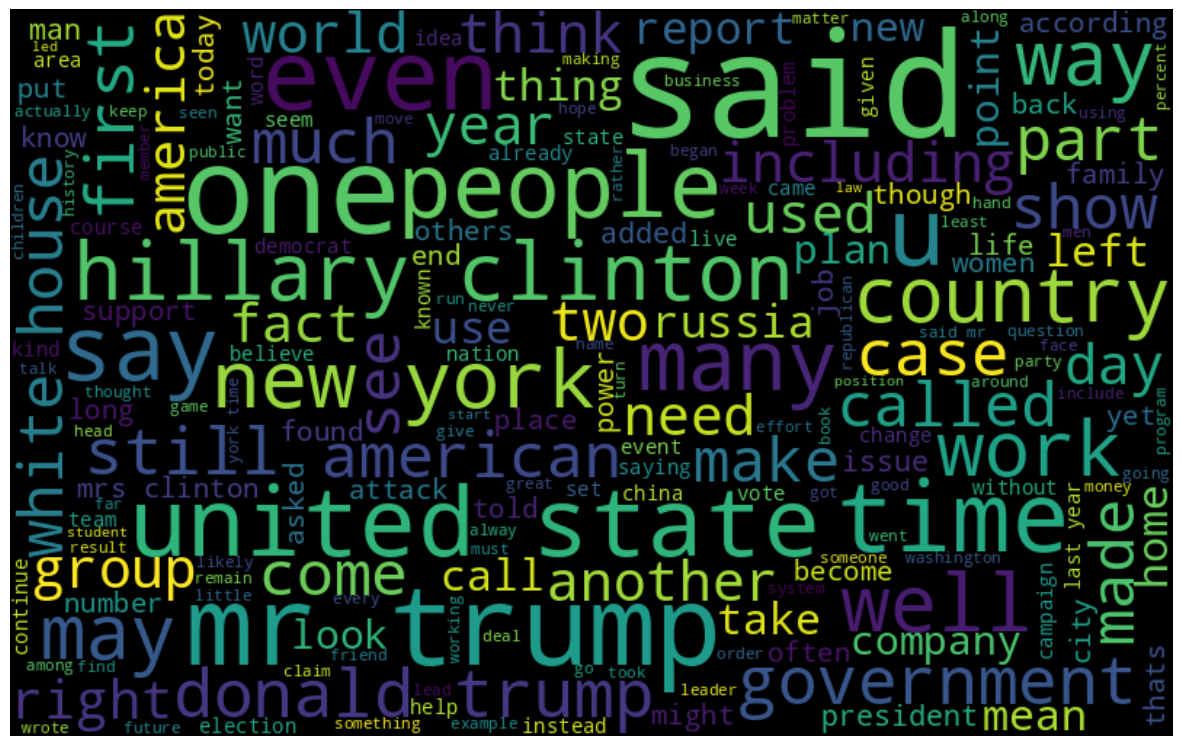

In [ ]:
from wordcloud import WordCloud
words=" ".join([sentence for sentence in df['clean_news']])
wordcloud=WordCloud(width=800, height=500, random_state=42,max_font_size=100).generate(words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

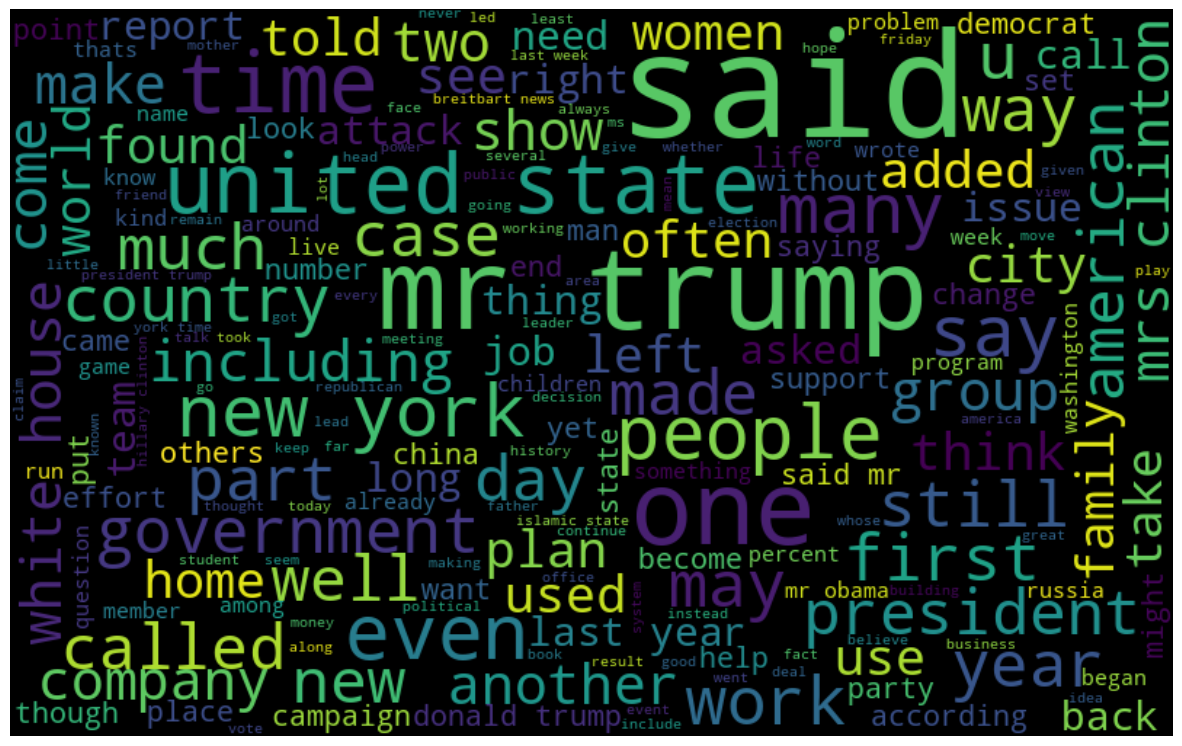

In [ ]:
words=" ".join([sentence for sentence in df['clean_news'][df['label']==0]])
wordcloud=WordCloud(width=800, height=500, random_state=42,max_font_size=100).generate(words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

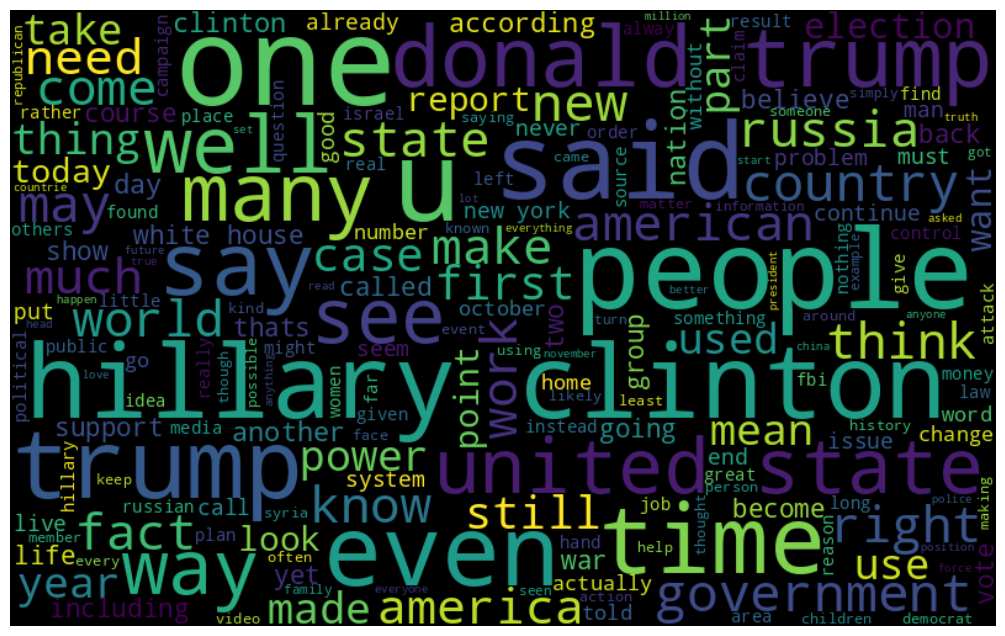

In [ ]:
words=" ".join([sentence for sentence in df['clean_news'][df['label']==1]])
wordcloud=WordCloud(width=800, height=500, random_state=42,max_font_size=100).generate(words)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Modelling

**Modelling approaches**
1.  *Long Short-Term Memory (LSTM)*

Recognizing the sequential nature of language, we incorporate Long Short-Term Memory (LSTM) networks. LSTMs, a specialized type of recurrent neural network (RNN), excel in capturing dependencies over extended sequences.
2. *Artificial Neural Network (ANN)*

We employ an Artificial Neural Network as the foundational framework for our fake news detection model. The ANN  is structured with multiple layers to capture intricate patterns within textual data.
3. *Machine Learning (ML)*

 we incorporate traditional Machine Learning techniques. Features extracted from the text, such as TF-IDF (Term Frequency-Inverse Document Frequency) and word embeddings, serve as input to ML classifiers. These classifiers, including Random Forest and Support Vector Machines.


## I. Using LSTM(Long short Term Memory)

**Setting up the data**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_news'])# Transforming text so that it can be feeded to the neural network
word_index=tokenizer.word_index
vocab_size=len(word_index)
vocab_size

199536

In [ ]:
sequences = tokenizer.texts_to_sequences(df['clean_news'])
padded_sequences = pad_sequences(sequences) ## Padding the required vectors so that all the text vectors are of same size

In [21]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

**Creating embedding matrix**

In [ ]:
embedding_index={}
with open('drive/MyDrive/glove.6B.100d.txt') as file: ## Using glove.6B.100.txt as reference trained on 6 billion parameters
    for line in file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs


In [ ]:
embedding_matrix = np.zeros((vocab_size+1,100))

In [ ]:
for word, index in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word.lower())
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector


In [ ]:
embedding_matrix[1]

array([-0.13128   , -0.45199999,  0.043399  , -0.99798   , -0.21053   ,
       -0.95867997, -0.24608999,  0.48413   ,  0.18178   ,  0.47499999,
       -0.22305   ,  0.30063999,  0.43496001, -0.36050001,  0.20245001,
       -0.52594   , -0.34707999,  0.0075873 , -1.04970002,  0.18673   ,
        0.57369   ,  0.43814   ,  0.098659  ,  0.38769999, -0.22579999,
        0.41911   ,  0.043602  , -0.73519999, -0.53583002,  0.19276001,
       -0.21961001,  0.42515001, -0.19081999,  0.47187001,  0.18826   ,
        0.13357   ,  0.41839001,  1.31379998,  0.35677999, -0.32172   ,
       -1.22570002, -0.26635   ,  0.36715999, -0.27586001, -0.53245997,
        0.16786   , -0.11253   , -0.99958998, -0.60706002, -0.89270997,
        0.65156001, -0.88783997,  0.049233  ,  0.67110997, -0.27553001,
       -2.40050006, -0.36989   ,  0.29135999,  1.34979999,  1.73529994,
        0.27000001,  0.021299  ,  0.14421999,  0.023784  ,  0.33643001,
       -0.35475999,  1.09210002,  1.48450005,  0.49430001,  0.15

## Model Training

In [ ]:
## splitting data
X_train,X_test,y_train,y_test=train_test_split(padded_sequences,df['label'],test_size=0.2, random_state=42,stratify=df['label'])

In [ ]:
X_train[0]

array([  0,   0,   0, ..., 104, 208,  39], dtype=int32)

In [ ]:
## Creating architecture/layers for the required text data
from keras.models import Sequential
from keras.layers import Embedding, LSTM
from keras.layers import Dropout,Dense
model = Sequential([
    Embedding(vocab_size+1, 100, weights=[embedding_matrix], trainable=False),
    Dropout(0.2),
    LSTM(32,return_sequences=True),
    LSTM(32),
    Dropout(0.2),
    Dense(512),
    Dropout(0.2),
    Dense(256),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         19953700  
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 lstm (LSTM)                 (None, None, 32)          17024     
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 512)               16896     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0

In [ ]:
his=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/10
130/130 [==============================] - 96s 685ms/step - loss: 0.4793 - accuracy: 0.7653 - val_loss: 0.3404 - val_accuracy: 0.8565
Epoch 2/10
130/130 [==============================] - 89s 687ms/step - loss: 0.3160 - accuracy: 0.8735 - val_loss: 0.2779 - val_accuracy: 0.8945
Epoch 3/10
130/130 [==============================] - 90s 691ms/step - loss: 0.2587 - accuracy: 0.8999 - val_loss: 0.2498 - val_accuracy: 0.9030
Epoch 4/10
130/130 [==============================] - 90s 691ms/step - loss: 0.2426 - accuracy: 0.9035 - val_loss: 0.2201 - val_accuracy: 0.9157
Epoch 5/10
130/130 [==============================] - 90s 694ms/step - loss: 0.2065 - accuracy: 0.9185 - val_loss: 0.2185 - val_accuracy: 0.9143
Epoch 6/10
130/130 [==============================] - 91s 696ms/step - loss: 0.1835 - accuracy: 0.9286 - val_loss: 0.1849 - val_accuracy: 0.9229
Epoch 7/10
130/130 [==============================] - 90s 693ms/step - loss: 0.1965 - accuracy: 0.9224 - val_loss: 0.1964 - val_ac

**Results**

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

# Print the accuracy
print(f'Test Accuracy: {accuracy * 100:.2f}%')

130/130 [==============================] - 34s 261ms/step - loss: 0.1733 - accuracy: 0.9381
Test Accuracy: 93.81%


## Visualizing the results

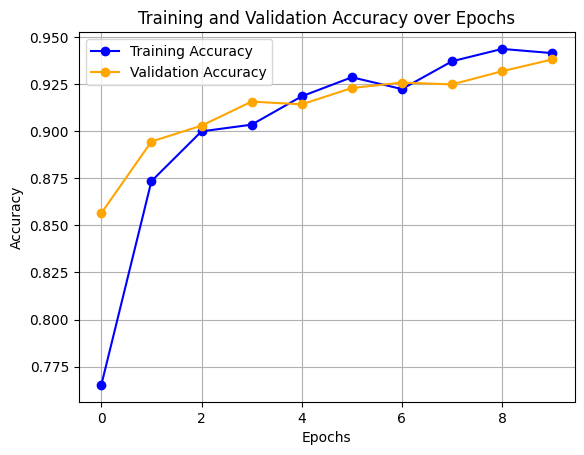

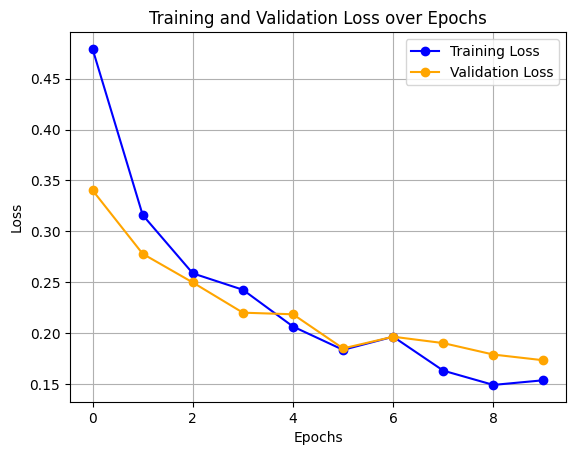

In [ ]:
## Plotting accuracy and loss statistics
plt.plot(his.history['accuracy'], label='Training Accuracy', color='blue', linestyle='-', marker='o')
plt.plot(his.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='-', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')

plt.legend()

plt.grid(True)

plt.show()

plt.plot(his.history['loss'], label='Training Loss', color='blue', linestyle='-', marker='o')
plt.plot(his.history['val_loss'], label='Validation Loss', color='orange', linestyle='-', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')

plt.legend()

plt.grid(True)

plt.show()

**Final results**

130/130 [==============================] - 35s 265ms/step
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      2078
           1       0.93      0.95      0.94      2075

    accuracy                           0.94      4153
   macro avg       0.94      0.94      0.94      4153
weighted avg       0.94      0.94      0.94      4153

Confusion Matrix:
[[1922  156]
 [ 101 1974]]


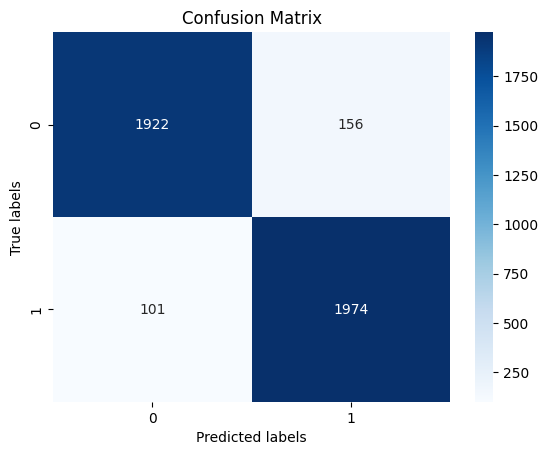

In [ ]:
## Obtaining classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred_binary))

conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## II. Using ANN(Artificial Neural Network)




**Setting up the data**

In [ ]:

tokenizerANN= Tokenizer()
tokenizerANN.fit_on_texts(df1['clean_news'])## Converting data as per required neural layers
index=tokenizerANN.word_index
vocsize=len(index)
vocsize

199536

In [ ]:
seq = tokenizerANN.texts_to_sequences(df1['clean_news'])
padded_seq = pad_sequences(seq)## Padding the text vectors

## Model training

In [ ]:
# Splitting the data
x_train,x_test,Y_train,Y_test=train_test_split(padded_seq,df1['label'],test_size=0.2, random_state=42,stratify=df1['label'])

In [ ]:
## Creating Artificial neural architecture
ann= tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizerANN.word_index) + 1, output_dim=16, input_length=x_train.shape[1]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

**Results**

In [ ]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=ann.fit(x_train, Y_train, epochs=10, validation_data=(x_test, Y_test),batch_size=128)
loss, accuracy = ann.evaluate(x_test, Y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/10
130/130 [==============================] - 33s 195ms/step - loss: 0.6094 - accuracy: 0.6455 - val_loss: 0.2713 - val_accuracy: 0.9126
Epoch 2/10
130/130 [==============================] - 25s 192ms/step - loss: 0.1640 - accuracy: 0.9482 - val_loss: 0.1069 - val_accuracy: 0.9617
Epoch 3/10
130/130 [==============================] - 24s 183ms/step - loss: 0.0569 - accuracy: 0.9851 - val_loss: 0.1079 - val_accuracy: 0.9644
Epoch 4/10
130/130 [==============================] - 25s 194ms/step - loss: 0.0217 - accuracy: 0.9947 - val_loss: 0.1206 - val_accuracy: 0.9694
Epoch 5/10
130/130 [==============================] - 25s 191ms/step - loss: 0.0112 - accuracy: 0.9968 - val_loss: 0.1549 - val_accuracy: 0.9673
Epoch 6/10
130/130 [==============================] - 24s 183ms/step - loss: 0.0061 - accuracy: 0.9984 - val_loss: 0.1679 - val_accuracy: 0.9704
Epoch 7/10
130/130 [==============================] - 21s 164ms/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.1661 - val_ac

## Visualizing results

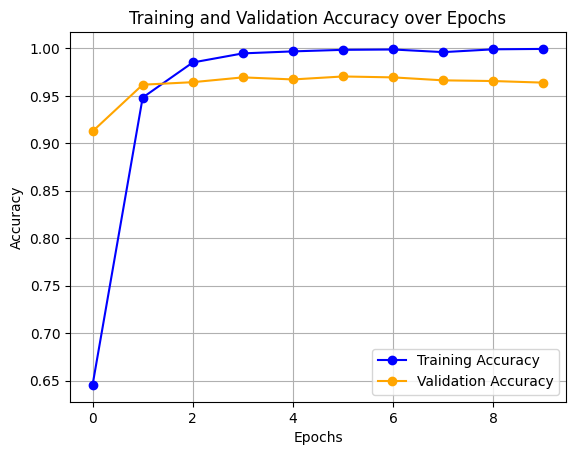

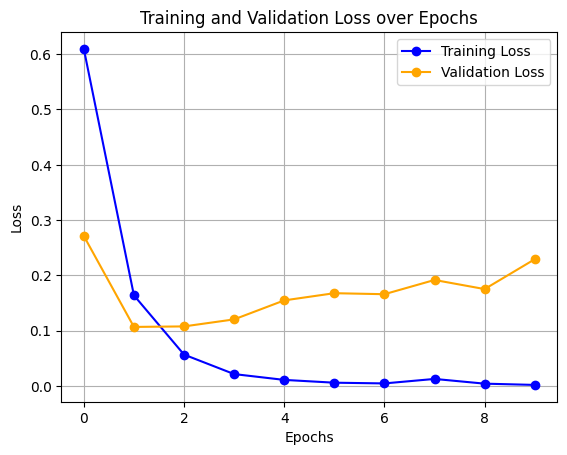

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='-', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='-', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')

plt.legend()

plt.grid(True)

plt.show()

plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='-', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')

plt.legend()
plt.grid(True)

plt.show()

## III. Using machine learning models

In [16]:
df2.head()

,text,label,clean_news
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide didnt even see comeys letter ja...
1,Ever get the feeling your life circles the rou...,0,ever get feeling life circles roundabout rathe...
2,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fired october 29 2016 tension ...
3,Videos 15 Civilians Killed In Single US Airstr...,1,videos 15 civilians killed single us airstrike...
4,Print \nAn Iranian woman has been sentenced to...,1,print iranian woman sentenced six years prison...


**Setting up data for machine learning model**

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
tf1=TfidfVectorizer(max_features=5000,ngram_range=(1,3)) ## Converting text to vectors using TFID vectorizer
X=tf1.fit_transform(df2['clean_news']).toarray()
y=df2['label']


## Model training

In [18]:
# Importing required packages
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [19]:
## Training multiple machine learning models simulataneously
def run_classification_models(X, y, test_size=0.2, random_state=42):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Define a list of classifiers
    classifiers = [
        RandomForestClassifier(),
        LogisticRegression(),
        KNeighborsClassifier(),
        DecisionTreeClassifier()
    ]
   ## Training all the classifier models
    accuracies = {}
    model_names = {}
    for clf in classifiers:
        model_name = clf.__class__.__name__
        model_names[model_name] = clf
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracies[model_name] = acc

    plt.figure(figsize=(10, 6))
    plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
    plt.xlabel('Accuracy')
    plt.title('Accuracy Comparison of Classification Models')
    plt.show()
    return accuracies, model_names

## Visualizing results

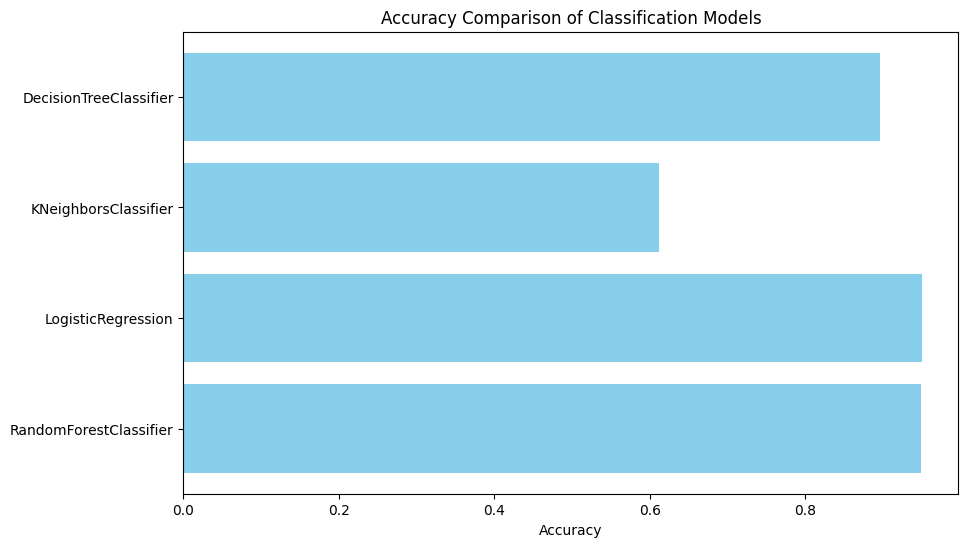

Accuracies: {'RandomForestClassifier': 0.948952564411269, 'LogisticRegression': 0.9494341439922948, 'KNeighborsClassifier': 0.6123284372742596, 'DecisionTreeClassifier': 0.895738020707922}


In [22]:
accuracies, models = run_classification_models(X, y)
print("Accuracies:", accuracies)

## Predictions

In [33]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [28]:
## Using Random Forest Classifier due to highest accuracy for predictions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
clf=RandomForestClassifier()

In [30]:
clf.fit(X_train, y_train)

RandomForestClassifier()

**Performing predictions**

In [26]:
wn=WordNetLemmatizer()

In [23]:
final_news=[
    "Michigan governor denies misleading U.S. House on Flint water (Reuters) - Michigan Governor Rick Snyder denied Thursday that he had misled a U.S. House of Representatives committee last year over testimony on Flintâ€™s water crisis after lawmakers asked if his testimony had been contradicted by a witness in a court hearing. The House Oversight and Government Reform Committee wrote Snyder earlier Thursday asking him about published reports that one of his aides, Harvey Hollins, testified in a court hearing last week in Michigan that he had notified Snyder of an outbreak of Legionnairesâ€™ disease linked to the Flint water crisis in December 2015, rather than 2016 as Snyder had testified. â€œMy testimony was truthful and I stand by it,â€ Snyder told the committee in a letter, adding that his office has provided tens of thousands of pages of records to the committee and would continue to cooperate fully.  Last week, prosecutors in Michigan said Dr. Eden Wells, the stateâ€™s chief medical executive who already faced lesser charges, would become the sixth current or former official to face involuntary manslaughter charges in connection with the crisis. The charges stem from more than 80 cases of Legionnairesâ€™ disease and at least 12 deaths that were believed to be linked to the water in Flint after the city switched its source from Lake Huron to the Flint River in April 2014. Wells was among six current and former Michigan and Flint officials charged in June. The other five, including Michigan Health and Human Services Director Nick Lyon, were charged at the time with involuntary manslaughter",
    " WATCH: Fox News Host Loses Her Sh*t, Says Investigating Russia For Hacking Our Election Is Unpatriotic This woman is insane.In an incredibly disrespectful rant against President Obama and anyone else who supports investigating Russian interference in our election, Fox News host Jeanine Pirro said that anybody who is against Donald Trump is anti-American. Look, it s time to take sides,  she began.",
    " Sarah Palin Celebrates After White Man Who Pulled Gun On Black Protesters Goes Unpunished (VIDEO) Sarah Palin, one of the nigh-innumerable  deplorables  in Donald Trump s  basket,  almost outdid herself in terms of horribleness on Friday."
]  ## Using Random news

**Performing preprocessing and modelling to obtain final Predictions**

In [24]:
def textpreprocessandclean(text):
    corp=re.sub(r'[^a-zA-Z]', ' ',text)
    corp=corp.lower()
    corp=corp.split()
    corp=[wn.lemmatize(word) for word in corp if not word in set(stopwords.words('english'))]
    corp=' '.join(corp)
    return corp

In [38]:
def transformandpredict(corpus):
    dim_x=tf1.transform(corpus).toarray()
    final_prediction=clf.predict(dim_x)
    return final_prediction

In [40]:
preprocessed_text=[textpreprocessandclean(text) for text in final_news]
preprocessed_text
transformandpredict(preprocessed_text)

array([0, 1, 1])